In [75]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [76]:
import os
os.chdir("/content/gdrive/My Drive/OwnJupyterNotebooks/")
os.getcwd()

'/content/gdrive/My Drive/OwnJupyterNotebooks'

## Neural Net in Numpy From Scratch


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# Define sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
# define neural net --> sum of inputs, weights, and biases
# a=input, w=weight, b=bias
def neural_net(a1,a2,w1,w2,b):
  sum_vectors = a1*w1 + a2*w2 + b
  return sigmoid(sum_vectors)

In [80]:
# Create random weights
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
print(w1, w2, b)

0.006210459307389378 1.4693508706342011 0.8949148890471177


In [0]:
# Establish flower data- length/width ratio corresponds to flower color
# Labels should be divided close to 0 and 1
lengths = [1.5, 2.5, 2.2, 1.9, 2.3, 3.2, 3.0, 2, 1.7, 2.1]
widths =  [3,   5,   4,   3,   5,   6,   4.2, 4, 4.1, 3.4]
labels = ['purple', 'blue', 'purple', 'purple', 'blue', 'blue', 'purple', 'blue', 'blue', 'purple' ]


In [82]:
print(neural_net(1.4, 2.5, w1, w2, b))
print(neural_net(2.5, 5, w1, w2, b))
print(neural_net(2.2, 4, w1, w2, b))
print(neural_net(1.9, 3, w1, w2, b))
print(neural_net(2.3, 5, w1, w2, b))

0.9898188775459718
0.9997406818164373
0.9988717756381622
0.9951056497068653
0.9997403596029935


### The predictions are not sorting correctly- our weights are random and have no meaning. A cost function helps the model modify output so that its preditions can be closer to the labels.

#### The Squared Error cost function takes the difference between the label and the prediction and squares it.  A Cost function for linear regression adds sums the costs of individual data points.  The Mean Squared Error sums these and divides by the number of data points.  The slope (derivative) of the cost function goes to zero as we get closer to a mimimum cost.  As the slope decreases in magnitude, smaller and smaller increments are needed to get to the local mimimum.  Modulating increment size as the derivative approaches zero is key to avoid overreaching the minimum. Subtract a fraction of the slope. <br>
If cost function is c(b) = (b - w)^2, where b is the output of the network and w is the label in the data, a new b = b - (fraction of slope)* (dc/db c(b))

### The Cost Function

In [0]:
 # Define Cost Function
def cost(output, label):
  c = (output-label)**2
  return c

In [0]:
# Define Slope Function
def derivative(output, label):
  slope = 2*(output - label)
  return slope

In [30]:
print(derivative(8,5))

6


In [0]:
def slope(b):
  return 2*(b-4)

In [0]:
b=8

In [64]:
# press CTRL + ENTER to watch the value of b go to zero
b = b - (.1)*slope(b)
print(b)

4.5368709119999995


In [0]:
# Attempt at recursive cost function
# # Recursive Incremental output, slope has to \
# import math
# def rec_increment(starting_output, slope, fraction): # f = Chosen fraction of slope
#   increment_output = starting_output - (fraction)*(slope)
#   if increment_output >= 0 and increment_output <= .05:
#     return increment_output
#   else:
#     starting_output = increment_output
#     return rec_increment(starting_output, slope, fraction)
  

In [0]:
#print(rec_increment(8, 5.2, .1))

In [69]:
for i in range(50):
  b = b - (.1)*slope(b)
  print(b)
  

4.429496729599999
4.34359738368
4.274877906944
4.2199023255552
4.17592186044416
4.140737488355328
4.1125899906842625
4.09007199254741
4.072057594037927
4.057646075230342
4.046116860184274
4.0368934881474186
4.0295147905179345
4.023611832414348
4.018889465931478
4.015111572745182
4.012089258196146
4.009671406556917
4.007737125245534
4.006189700196427
4.004951760157142
4.003961408125713
4.003169126500571
4.0025353012004565
4.002028240960366
4.0016225927682925
4.001298074214634
4.001038459371707
4.000830767497366
4.000664613997893
4.000531691198314
4.0004253529586515
4.000340282366921
4.0002722258935375
4.00021778071483
4.000174224571864
4.000139379657491
4.000111503725993
4.000089202980794
4.000071362384635
4.000057089907708
4.000045671926166
4.000036537540933
4.000029230032746
4.000023384026197
4.000018707220958
4.000014965776766
4.000011972621413
4.0000095780971305
4.000007662477705


In [0]:
# Try with a negative number
b = -6

In [74]:
for i in range(30):
  b = b - (.1)*slope(b)
  print(b)

-4.0
-2.4
-1.1199999999999997
-0.09599999999999986
0.7232000000000002
1.3785600000000002
1.902848
2.3222784
2.65782272
2.926258176
3.1410065408000003
3.31280523264
3.450244186112
3.5601953488896
3.64815627911168
3.7185250232893443
3.7748200186314755
3.8198560149051803
3.8558848119241445
3.8847078495393155
3.9077662796314523
3.926213023705162
3.9409704189641297
3.9527763351713037
3.962221068137043
3.9697768545096346
3.9758214836077075
3.980657186886166
3.984525749508933
3.9876205996071463


### With cost functions of two input variables or more, take the partial derivative of each input variable to get local mimina.
Create cost functions for each input variable and using a fraction of the slope as with a single input variable. Subtract the gradient.

### Correcting Model and Predicting Label for an unknown value

In [0]:
# Recall data and add a mystery value
lengths = [1.5, 2.5, 2.2, 1.9, 2.3, 3.2, 3.0, 2, 1.7, 2.1]
widths =  [3,   5,   4,   3,   5,   6,   4.2, 4, 4.1, 3.4]
labels = ['purple', 'blue', 'purple', 'purple', 'blue', 'blue', 'purple', 'blue', 'blue', 'purple']


In [131]:
# Change values in labels
labels = [0 if item =='purple' else 1 for item in labels]
print(labels)

[0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


In [133]:
data = []
for i in range(len(lengths)):
  data.append([lengths[i], widths[i], labels[i]])
data  

[[1.5, 3, 0],
 [2.5, 5, 1],
 [2.2, 4, 0],
 [1.9, 3, 0],
 [2.3, 5, 1],
 [3.2, 6, 1],
 [3.0, 4.2, 0],
 [2, 4, 1],
 [1.7, 4.1, 1],
 [2.1, 3.4, 0]]

In [0]:
# Create new data point for prediction later
mystery_flower = [2, 3.2, '?']

In [99]:
# Recall weight generation
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
print(w1, w2, b)

-0.903399359021329 -0.6385886534805114 0.5262900963297914


In [0]:
# Redefine sigmoid function and define derivative of sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_ddx(x):
  return sigmoid(x)*(1 - sigmoid(x))

In [124]:
# Testing Sigmoid
test_data = np.linspace(-30,30,30)
output = sigmoid(test_data)
d_output = sigmoid_ddx(test_data)
test_data, output, d_output

(array([-30.        , -27.93103448, -25.86206897, -23.79310345,
        -21.72413793, -19.65517241, -17.5862069 , -15.51724138,
        -13.44827586, -11.37931034,  -9.31034483,  -7.24137931,
         -5.17241379,  -3.10344828,  -1.03448276,   1.03448276,
          3.10344828,   5.17241379,   7.24137931,   9.31034483,
         11.37931034,  13.44827586,  15.51724138,  17.5862069 ,
         19.65517241,  21.72413793,  23.79310345,  25.86206897,
         27.93103448,  30.        ]),
 array([9.35762297e-14, 7.40808318e-13, 5.86470481e-12, 4.64286937e-11,
        3.67558755e-10, 2.90982639e-09, 2.30360163e-08, 1.82367572e-07,
        1.44373463e-06, 1.14293977e-05, 9.04751522e-05, 7.15810295e-04,
        5.63888663e-03, 4.29652408e-02, 2.62215951e-01, 7.37784049e-01,
        9.57034759e-01, 9.94361113e-01, 9.99284190e-01, 9.99909525e-01,
        9.99988571e-01, 9.99998556e-01, 9.99999818e-01, 9.99999977e-01,
        9.99999997e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.

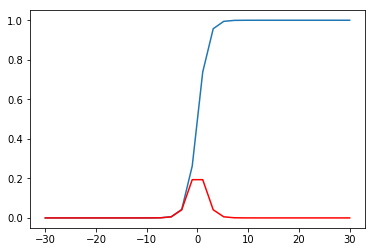

In [125]:
plt.plot(test_data, output)
plt.plot(test_data, d_output, c = 'r')

In [126]:
test_data = np.linspace(-8,8,10)
output = sigmoid(test_data)
d_output = sigmoid_ddx(test_data)
test_data, output

(array([-8.        , -6.22222222, -4.44444444, -2.66666667, -0.88888889,
         0.88888889,  2.66666667,  4.44444444,  6.22222222,  8.        ]),
 array([3.35350130e-04, 1.98089784e-03, 1.16073164e-02, 6.49691691e-02,
        2.91339175e-01, 7.08660825e-01, 9.35030831e-01, 9.88392684e-01,
        9.98019102e-01, 9.99664650e-01]))

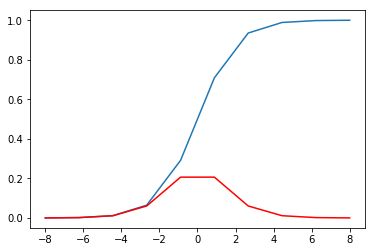

In [127]:
plt.plot(test_data, output)
plt.plot(test_data, d_output, c = 'r')

#### Slope decreases as growth of sigmoid slows

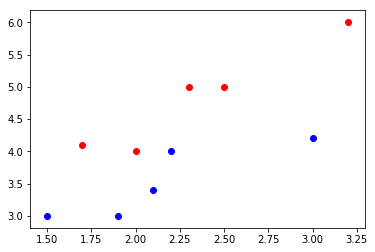

In [135]:
# Scatterplot
for i in range(len(data)):
  point = data[i]
  color = 'r'
  if point[2] == 0:
    color = 'b'
  plt.scatter(point[0], point[1], c= color)  


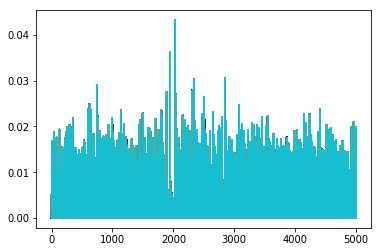

In [154]:
# Training Loop
learning_rate = .2 #tinker with learning rate and until the cost plot shows a decreasing trend
costs = []

for i in range(5000):
  rand_index = np.random.randint(len(data))
  point = data[rand_index]
  
  z = point[0]*w1 + point[1]*w2 + b
  prediction = sigmoid(z)
  
  target = point[2]
  cost = np.square(prediction - target)
  costs.append(cost)
 
  dc_dpred = 2 *(prediction - target)
  dpred_dz = sigmoid_ddx(z)
  dz_dw1 = point[0]
  dz_dw2 = point[1]
  dz_db = 1
  
  dcost_dw1 = dc_dpred * dpred_dz * dz_dw1
  dcost_dw2 = dc_dpred * dpred_dz * dz_dw2
  dcost_db = dc_dpred * dpred_dz * dz_db
  
  w1 = w1 - learning_rate*dcost_dw1
  w2 = w2 - learning_rate*dcost_dw2
  b = b - learning_rate*dcost_db
  
  plt.plot(costs)

In [153]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 + b
pred = sigmoid(z)
print(pred)


4.5624591958959724e-05


#### Yay, the mystery flower was labeled as predicted.